In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mission1

In [19]:
netflix = pd.read_csv("C:/Users/wey05/WI/KDT_AI_DEV/netflix_titles.csv")

In [20]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
sk = (netflix['country'] == "South Korea").sum()
print(f"한국 작품의 개수: {sk}")

한국 작품의 개수: 183


## Mission2

In [24]:
coin = pd.read_csv("C:/Users/wey05/WI/KDT_AI_DEV/BitCoin.csv")
coin.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [31]:
start = '2016-06-01'
end = '2017-06-30'

coin['Date'] = pd.to_datetime(coin['Date'])
coin_1y = coin[(coin['Date'] >= start)&(coin['Date'] <= end)].sort_values('Date')
coin_1y['5_MA'] = coin_1y['Open'].rolling(5).mean()
coin_1y_min = coin_1y[coin_1y['5_MA'] == coin_1y['5_MA'].min()]
coin_1y_max = coin_1y[coin_1y['5_MA'] == coin_1y['5_MA'].max()]

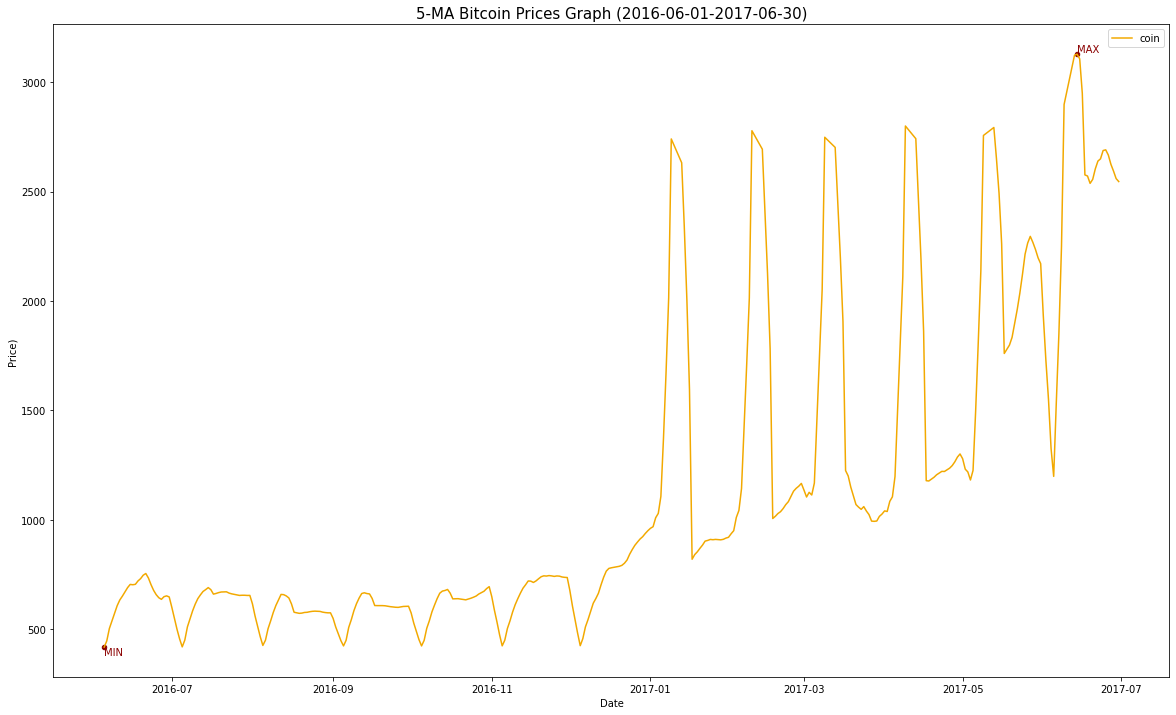

In [35]:

plt.figure(figsize=(20, 12))

plt.plot(coin_1y['Date'], coin_1y['5_MA'], color='#f2a900')
plt.scatter(coin_1y_min['Date'], coin_1y_min['5_MA'], color='darkred', s=20)
plt.scatter(coin_1y_max['Date'], coin_1y_max['5_MA'], color='darkred', s=20)

plt.text(coin_1y_min['Date'], coin_1y_min['5_MA'], 'MIN', horizontalalignment='left', verticalalignment='top', color='darkred')
plt.text(coin_1y_max['Date'], coin_1y_max['5_MA'], 'MAX', horizontalalignment='left', verticalalignment='bottom', color='darkred')
plt.xlabel('Date')
plt.ylabel('Price)')
plt.title(f'5-MA Bitcoin Prices Graph ({start}-{end})', size=15)
plt.legend(['coin'])

plt.show()